# Question 1.a

Importing libraries

In [379]:
import numpy as np

In [380]:
import pandas as pd

In [381]:
import matplotlib.pyplot as plt

In [382]:
import seaborn as sns

In [383]:
import altair as alt

Reading dataset

In [384]:
data=pd.read_excel('C:/Users/Samaneh/Downloads/Data_Cortex_Nuclear.xls')

making a copy of data set

In [385]:
datacort=data.copy()

# Data investigation

In [386]:
datacort.dtypes.value_counts()

float64    77
object      5
dtype: int64

In [387]:
print("Total number of Rows",datacort.shape[0],'rows')

Total number of Rows 1080 rows


In [388]:
datacort.describe(include = np.object)

C:\Users\Samaneh\AppData\Local\Temp/ipykernel_13808/2942233707.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  datacort.describe(include = np.object)


,MouseID,Genotype,Treatment,Behavior,class
count,1080,1080,1080,1080,1080
unique,1080,2,2,2,8
top,309_1,Control,Memantine,S/C,c-CS-m
freq,1,570,570,555,150


In [389]:
print("Total number of Columns",datacort.shape[1],'columns')

Total number of Columns 82 columns


This heatmap shows the NA values

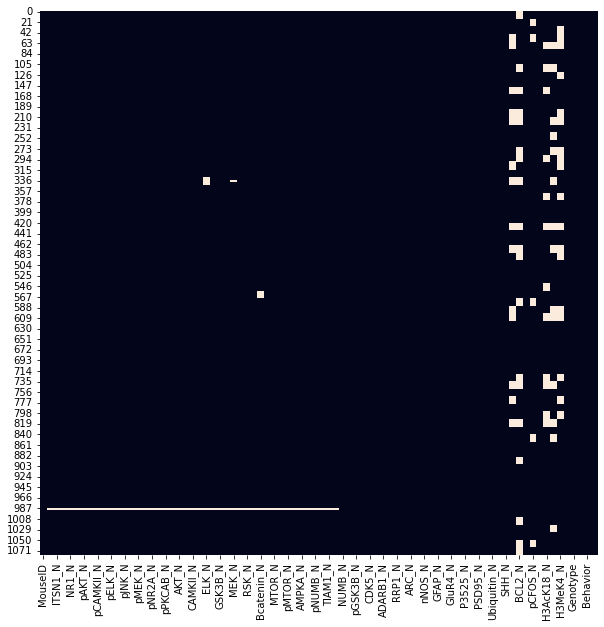

In [390]:
plt.figure(figsize=(10,10))
sns.heatmap(datacort.isna(),cbar=False)
plt.show()

Here  I am getting to know the data,NA values and unnecessary values which make the work hard and need to be considered

In [391]:
(datacort.isna().sum()/datacort.shape[0]*100).sort_values(ascending=False)

BCL2_N       26.388889
H3MeK4_N     25.000000
BAD_N        19.722222
EGR1_N       19.444444
H3AcK18_N    16.666667
               ...    
nNOS_N        0.000000
Tau_N         0.000000
GFAP_N        0.000000
GluR3_N       0.000000
class         0.000000
Length: 82, dtype: float64

In [392]:
Investigation = datacort.columns[datacort.isna().sum()/datacort.shape[0]< 0.70 ] 

In [393]:
datacort=datacort[Investigation]

In [394]:
datacort.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m


In [395]:
datacort['class'].value_counts(normalize=True)

c-CS-m    0.138889
c-SC-m    0.138889
c-CS-s    0.125000
c-SC-s    0.125000
t-CS-m    0.125000
t-SC-m    0.125000
t-SC-s    0.125000
t-CS-s    0.097222
Name: class, dtype: float64

In [396]:
datacort.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MouseID          1080 non-null   object 
 1   DYRK1A_N         1077 non-null   float64
 2   ITSN1_N          1077 non-null   float64
 3   BDNF_N           1077 non-null   float64
 4   NR1_N            1077 non-null   float64
 5   NR2A_N           1077 non-null   float64
 6   pAKT_N           1077 non-null   float64
 7   pBRAF_N          1077 non-null   float64
 8   pCAMKII_N        1077 non-null   float64
 9   pCREB_N          1077 non-null   float64
 10  pELK_N           1077 non-null   float64
 11  pERK_N           1077 non-null   float64
 12  pJNK_N           1077 non-null   float64
 13  PKCA_N           1077 non-null   float64
 14  pMEK_N           1077 non-null   float64
 15  pNR1_N           1077 non-null   float64
 16  pNR2A_N          1077 non-null   float64
 17  pNR2B_N       

In [397]:
datacort.isnull().sum()

MouseID      0
DYRK1A_N     3
ITSN1_N      3
BDNF_N       3
NR1_N        3
            ..
CaNA_N       0
Genotype     0
Treatment    0
Behavior     0
class        0
Length: 82, dtype: int64

This is the percentage of NA values

In [398]:
MissingValPer1 = datacort['DYRK1A_N'].isnull().sum() * 100 / len(datacort)
MissingValPer1

0.2777777777777778

In [399]:
NotNA = datacort[datacort['DYRK1A_N'].notna()]
NotNA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1077 entries, 0 to 1079
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MouseID          1077 non-null   object 
 1   DYRK1A_N         1077 non-null   float64
 2   ITSN1_N          1077 non-null   float64
 3   BDNF_N           1077 non-null   float64
 4   NR1_N            1077 non-null   float64
 5   NR2A_N           1077 non-null   float64
 6   pAKT_N           1077 non-null   float64
 7   pBRAF_N          1077 non-null   float64
 8   pCAMKII_N        1077 non-null   float64
 9   pCREB_N          1077 non-null   float64
 10  pELK_N           1077 non-null   float64
 11  pERK_N           1077 non-null   float64
 12  pJNK_N           1077 non-null   float64
 13  PKCA_N           1077 non-null   float64
 14  pMEK_N           1077 non-null   float64
 15  pNR1_N           1077 non-null   float64
 16  pNR2A_N          1077 non-null   float64
 17  pNR2B_N       

I totally counted the NA values and dropped them , these threes have less NA values compared to others

In [400]:
DropNA = NotNA.dropna(axis=0, subset=('ELK_N', 'MEK_N', 'Bcatenin_N'))
DropNA.shape

(1047, 82)

In [401]:
DropNA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1047 entries, 0 to 1079
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MouseID          1047 non-null   object 
 1   DYRK1A_N         1047 non-null   float64
 2   ITSN1_N          1047 non-null   float64
 3   BDNF_N           1047 non-null   float64
 4   NR1_N            1047 non-null   float64
 5   NR2A_N           1047 non-null   float64
 6   pAKT_N           1047 non-null   float64
 7   pBRAF_N          1047 non-null   float64
 8   pCAMKII_N        1047 non-null   float64
 9   pCREB_N          1047 non-null   float64
 10  pELK_N           1047 non-null   float64
 11  pERK_N           1047 non-null   float64
 12  pJNK_N           1047 non-null   float64
 13  PKCA_N           1047 non-null   float64
 14  pMEK_N           1047 non-null   float64
 15  pNR1_N           1047 non-null   float64
 16  pNR2A_N          1047 non-null   float64
 17  pNR2B_N       

I have some sorts of NA values in other columns as well so I just want to check the amount of losing data by NA values and then I will replace them with the mean values because we can see here the percentage are pretty high so it sould be better to keep them

In [402]:
MissValPerc = DropNA['BAD_N'].isnull().sum() * 100 / len(DropNA)
print('BAD_N', 'Missing Values Percentage:', MissValPerc)

BAD_N Missing Values Percentage: 18.911174785100286


In [403]:
MissValPerc = DropNA['BCL2_N'].isnull().sum() * 100 / len(DropNA)
print('BCL2_N', 'Missing Values Percentage:', MissValPerc)

BCL2_N Missing Values Percentage: 25.787965616045845


In [404]:
MissValPerc = DropNA['pCFOS_N'].isnull().sum() * 100 / len(DropNA)
print('pCFOS_N', 'Missing Values Percentage:', MissValPerc)

pCFOS_N Missing Values Percentage: 7.163323782234957


In [405]:
MissValPerc = DropNA['H3AcK18_N'].isnull().sum() * 100 / len(DropNA)
print('H3AcK18_N', 'Missing Values Percentage:', MissValPerc)

H3AcK18_N Missing Values Percentage: 17.191977077363898


In [406]:
MissValPerc = DropNA['EGR1_N'].isnull().sum() * 100 / len(DropNA)
print('EGR1_N', 'Missing Values Percentage:', MissValPerc)

EGR1_N Missing Values Percentage: 18.624641833810887


In [407]:
MissValPerc = DropNA['H3MeK4_N'].isnull().sum() * 100 / len(DropNA)
print('H3MeK4_N', 'Missing Values Percentage:', MissValPerc)

H3MeK4_N Missing Values Percentage: 25.787965616045845


Because the percentage of missing values are high so I prefer to replace them with mean values instead of removing them.

In [408]:
Rep1=DropNA['H3MeK4_N'].fillna(DropNA['H3MeK4_N'].mean(), inplace=True)
DropNA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1047 entries, 0 to 1079
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MouseID          1047 non-null   object 
 1   DYRK1A_N         1047 non-null   float64
 2   ITSN1_N          1047 non-null   float64
 3   BDNF_N           1047 non-null   float64
 4   NR1_N            1047 non-null   float64
 5   NR2A_N           1047 non-null   float64
 6   pAKT_N           1047 non-null   float64
 7   pBRAF_N          1047 non-null   float64
 8   pCAMKII_N        1047 non-null   float64
 9   pCREB_N          1047 non-null   float64
 10  pELK_N           1047 non-null   float64
 11  pERK_N           1047 non-null   float64
 12  pJNK_N           1047 non-null   float64
 13  PKCA_N           1047 non-null   float64
 14  pMEK_N           1047 non-null   float64
 15  pNR1_N           1047 non-null   float64
 16  pNR2A_N          1047 non-null   float64
 17  pNR2B_N       

C:\Users\Samaneh\anaconda3\lib\site-packages\pandas\core\generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [409]:
Rep1=DropNA['EGR1_N'].fillna(DropNA['EGR1_N'].mean(), inplace=True)
DropNA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1047 entries, 0 to 1079
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MouseID          1047 non-null   object 
 1   DYRK1A_N         1047 non-null   float64
 2   ITSN1_N          1047 non-null   float64
 3   BDNF_N           1047 non-null   float64
 4   NR1_N            1047 non-null   float64
 5   NR2A_N           1047 non-null   float64
 6   pAKT_N           1047 non-null   float64
 7   pBRAF_N          1047 non-null   float64
 8   pCAMKII_N        1047 non-null   float64
 9   pCREB_N          1047 non-null   float64
 10  pELK_N           1047 non-null   float64
 11  pERK_N           1047 non-null   float64
 12  pJNK_N           1047 non-null   float64
 13  PKCA_N           1047 non-null   float64
 14  pMEK_N           1047 non-null   float64
 15  pNR1_N           1047 non-null   float64
 16  pNR2A_N          1047 non-null   float64
 17  pNR2B_N       

In [410]:
Rep1=DropNA['H3AcK18_N'].fillna(DropNA['H3AcK18_N'].mean(), inplace=True)
DropNA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1047 entries, 0 to 1079
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MouseID          1047 non-null   object 
 1   DYRK1A_N         1047 non-null   float64
 2   ITSN1_N          1047 non-null   float64
 3   BDNF_N           1047 non-null   float64
 4   NR1_N            1047 non-null   float64
 5   NR2A_N           1047 non-null   float64
 6   pAKT_N           1047 non-null   float64
 7   pBRAF_N          1047 non-null   float64
 8   pCAMKII_N        1047 non-null   float64
 9   pCREB_N          1047 non-null   float64
 10  pELK_N           1047 non-null   float64
 11  pERK_N           1047 non-null   float64
 12  pJNK_N           1047 non-null   float64
 13  PKCA_N           1047 non-null   float64
 14  pMEK_N           1047 non-null   float64
 15  pNR1_N           1047 non-null   float64
 16  pNR2A_N          1047 non-null   float64
 17  pNR2B_N       

In [411]:
Rep1=DropNA['pCFOS_N'].fillna(DropNA['pCFOS_N'].mean(), inplace=True)
DropNA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1047 entries, 0 to 1079
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MouseID          1047 non-null   object 
 1   DYRK1A_N         1047 non-null   float64
 2   ITSN1_N          1047 non-null   float64
 3   BDNF_N           1047 non-null   float64
 4   NR1_N            1047 non-null   float64
 5   NR2A_N           1047 non-null   float64
 6   pAKT_N           1047 non-null   float64
 7   pBRAF_N          1047 non-null   float64
 8   pCAMKII_N        1047 non-null   float64
 9   pCREB_N          1047 non-null   float64
 10  pELK_N           1047 non-null   float64
 11  pERK_N           1047 non-null   float64
 12  pJNK_N           1047 non-null   float64
 13  PKCA_N           1047 non-null   float64
 14  pMEK_N           1047 non-null   float64
 15  pNR1_N           1047 non-null   float64
 16  pNR2A_N          1047 non-null   float64
 17  pNR2B_N       

In [412]:
Rep1=DropNA['BCL2_N'].fillna(DropNA['BCL2_N'].mean(), inplace=True)
DropNA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1047 entries, 0 to 1079
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MouseID          1047 non-null   object 
 1   DYRK1A_N         1047 non-null   float64
 2   ITSN1_N          1047 non-null   float64
 3   BDNF_N           1047 non-null   float64
 4   NR1_N            1047 non-null   float64
 5   NR2A_N           1047 non-null   float64
 6   pAKT_N           1047 non-null   float64
 7   pBRAF_N          1047 non-null   float64
 8   pCAMKII_N        1047 non-null   float64
 9   pCREB_N          1047 non-null   float64
 10  pELK_N           1047 non-null   float64
 11  pERK_N           1047 non-null   float64
 12  pJNK_N           1047 non-null   float64
 13  PKCA_N           1047 non-null   float64
 14  pMEK_N           1047 non-null   float64
 15  pNR1_N           1047 non-null   float64
 16  pNR2A_N          1047 non-null   float64
 17  pNR2B_N       

In [413]:
Rep1=DropNA['BAD_N'].fillna(DropNA['BAD_N'].mean(), inplace=True)
DropNA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1047 entries, 0 to 1079
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MouseID          1047 non-null   object 
 1   DYRK1A_N         1047 non-null   float64
 2   ITSN1_N          1047 non-null   float64
 3   BDNF_N           1047 non-null   float64
 4   NR1_N            1047 non-null   float64
 5   NR2A_N           1047 non-null   float64
 6   pAKT_N           1047 non-null   float64
 7   pBRAF_N          1047 non-null   float64
 8   pCAMKII_N        1047 non-null   float64
 9   pCREB_N          1047 non-null   float64
 10  pELK_N           1047 non-null   float64
 11  pERK_N           1047 non-null   float64
 12  pJNK_N           1047 non-null   float64
 13  PKCA_N           1047 non-null   float64
 14  pMEK_N           1047 non-null   float64
 15  pNR1_N           1047 non-null   float64
 16  pNR2A_N          1047 non-null   float64
 17  pNR2B_N       

Now I have a data without NA values

I want to see an overview of the my data

In [414]:
DropNA.describe(include = np.object)

C:\Users\Samaneh\AppData\Local\Temp/ipykernel_13808/4068775509.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  DropNA.describe(include = np.object)


,MouseID,Genotype,Treatment,Behavior,class
count,1047,1047,1047,1047,1047
unique,1047,2,2,2,8
top,309_1,Control,Memantine,S/C,c-CS-m
freq,1,540,570,537,150


As we can see here I still have some unique values that should be considered because they dont have useful information

In [415]:
DropNA.describe(include = np.number).round(3)

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
count,1047.000,1047.000,1047.000,1047.000,1047.000,1047.000,1047.000,1047.000,1047.000,1047.000,...,1047.000,1047.000,1047.000,1047.000,1047.000,1047.000,1047.000,1047.000,1047.000,1047.000
mean,0.428,0.620,0.318,2.295,3.832,0.234,0.183,3.525,0.213,1.434,...,0.226,0.158,0.135,0.121,0.131,0.445,0.169,0.183,0.206,1.338
std,0.252,0.254,0.050,0.351,0.941,0.041,0.026,1.293,0.033,0.471,...,0.029,0.027,0.024,0.014,0.023,0.067,0.055,0.037,0.049,0.321
min,0.145,0.245,0.115,1.331,1.738,0.121,0.108,1.344,0.113,0.429,...,0.156,0.088,0.081,0.067,0.085,0.259,0.080,0.106,0.102,0.586
25%,0.289,0.475,0.286,2.052,3.143,0.206,0.165,2.448,0.191,1.211,...,0.206,0.141,0.120,0.110,0.114,0.397,0.134,0.159,0.174,1.076
50%,0.366,0.568,0.315,2.292,3.720,0.232,0.183,3.327,0.211,1.359,...,0.223,0.158,0.135,0.122,0.129,0.447,0.169,0.183,0.206,1.317
75%,0.489,0.702,0.346,2.529,4.405,0.258,0.198,4.432,0.235,1.565,...,0.241,0.168,0.140,0.132,0.143,0.491,0.186,0.196,0.219,1.591
max,2.516,2.603,0.497,3.758,8.483,0.539,0.317,7.464,0.306,6.113,...,0.358,0.282,0.262,0.159,0.257,0.760,0.480,0.361,0.414,2.130


Here I am going to delete ID column since it doesnt have any information for my purpose

In [416]:
PreparedData = DropNA.drop(['MouseID'], axis = 1)
PreparedData.shape

(1047, 81)

Here I have removed the Mouse ID column

Here I have the list of uniques values

In [417]:
UniqueValuesList = PreparedData.columns[PreparedData.dtypes==object].tolist()

In [418]:
UniqueValuesList

['Genotype', 'Treatment', 'Behavior', 'class']

Here i am going to see the uniques value of Genotype

In [419]:
UniqueValuesList1=PreparedData['Genotype'].value_counts()

In [420]:
print('The unique values of', 'Genotype', 'is:',UniqueValuesList1)

The unique values of Genotype is: Control    540
Ts65Dn     507
Name: Genotype, dtype: int64


Doing the same with tretment

In [421]:
UniqueValuesList2=PreparedData['Treatment'].value_counts()

In [422]:
print('The unique values and numbers of', 'Treatment', 'is:',UniqueValuesList2)

The unique values and numbers of Treatment is: Memantine    570
Saline       477
Name: Treatment, dtype: int64


and the same again with Behavior

In [423]:
UniqueValuesList3=PreparedData['Behavior'].value_counts()

In [424]:
print('The unique values and numbers of', 'Behavior', 'is:',UniqueValuesList3)

The unique values and numbers of Behavior is: S/C    537
C/S    510
Name: Behavior, dtype: int64


And also with Class

In [425]:
UniqueValuesList4=PreparedData['class'].value_counts()

In [426]:
print('The unique values and numbers of', 'class', 'is:',UniqueValuesList4)

The unique values and numbers of class is: c-CS-m    150
c-SC-m    150
t-CS-m    135
t-SC-m    135
t-SC-s    132
c-CS-s    120
c-SC-s    120
t-CS-s    105
Name: class, dtype: int64


It seems I have duplicated values here because I already had the information about the Genotype, Treatment and Behavior so I am going to Drop them.

In [427]:
DataFinal = PreparedData.drop(['Genotype', 'Treatment', 'Behavior'], axis = 1)

In [428]:
DataFinal.shape

(1047, 78)

In [429]:
DataFinal.head()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,class
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.122652,0.13486,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,c-CS-m
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.116682,0.13486,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,c-CS-m
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.118508,0.13486,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,c-CS-m
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.132781,0.13486,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,c-CS-m
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.129954,0.13486,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,c-CS-m


Here I am going to do some plots for better understanding

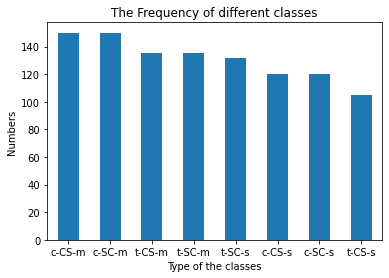

In [430]:
PreparedData['class'].value_counts().plot(kind='bar')
plt.title('The Frequency of different classes')
plt.xlabel('Type of the classes')
plt.xticks(rotation='horizontal')
plt.ylabel('Numbers')
plt.show()

the boxplot for column name 'DYRK1A_N'

This Box Plot Distribution of 'DYRK1A_N' depicts that this protein level is quite diagonal. There are some outliers that can be seen in the plot. I dont know exactly if they are true outliers or not, so I will not remove them.

And I will do the same for others

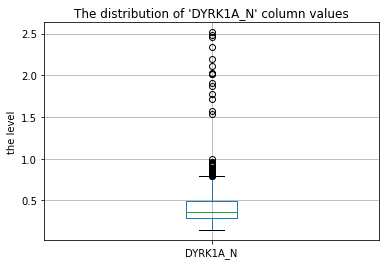

In [431]:
PreparedData.boxplot(column = 'DYRK1A_N')
plt.title("The distribution of 'DYRK1A_N' column values")
plt.ylabel('the level')
plt.show()

I will also do the same for other columns as well

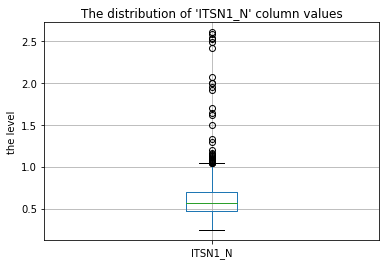

In [432]:
PreparedData.boxplot(column = 'ITSN1_N')
plt.title("The distribution of 'ITSN1_N' column values")
plt.ylabel('the level')
plt.show()

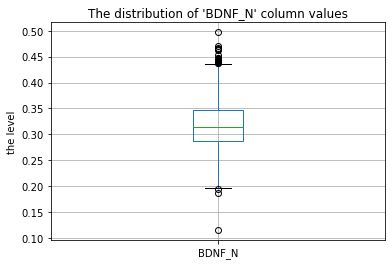

In [433]:
PreparedData.boxplot(column = 'BDNF_N')
plt.title("The distribution of 'BDNF_N' column values")
plt.ylabel('the level')
plt.show()

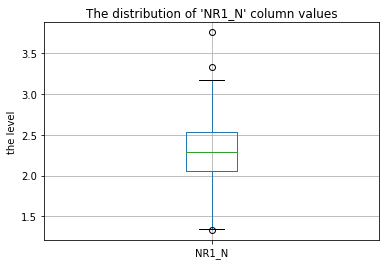

In [434]:
PreparedData.boxplot(column = 'NR1_N')
plt.title("The distribution of 'NR1_N' column values")
plt.ylabel('the level')
plt.show()

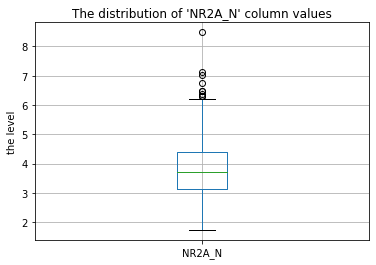

In [435]:
PreparedData.boxplot(column = 'NR2A_N')
plt.title("The distribution of 'NR2A_N' column values")
plt.ylabel('the level')
plt.show()

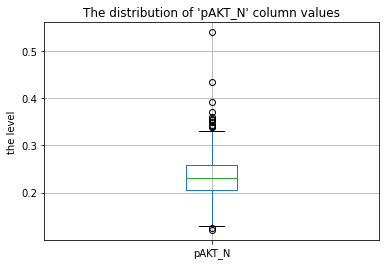

In [436]:
PreparedData.boxplot(column = 'pAKT_N')
plt.title("The distribution of 'pAKT_N' column values")
plt.ylabel('the level')
plt.show()

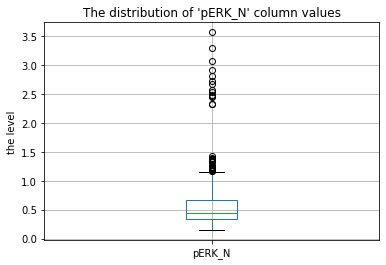

In [437]:
PreparedData.boxplot(column = 'pERK_N')
plt.title("The distribution of 'pERK_N' column values")
plt.ylabel('the level')
plt.show()

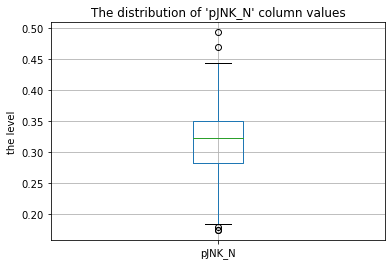

In [438]:
PreparedData.boxplot(column = 'pJNK_N')
plt.title("The distribution of 'pJNK_N' column values")
plt.ylabel('the level')
plt.show()

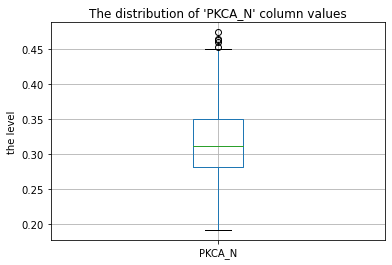

In [439]:
PreparedData.boxplot(column = 'PKCA_N')
plt.title("The distribution of 'PKCA_N' column values")
plt.ylabel('the level')
plt.show()

Droping some descriptive features in this step and because class is my target feature so I will keep it in the other container

In [440]:
Data2 = DataFinal.drop(columns = 'class')

In [441]:
Data2

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.188852,0.122652,0.13486,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.200404,0.116682,0.13486,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.193685,0.118508,0.13486,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.192112,0.132781,0.13486,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.205604,0.129954,0.13486,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,1.057971,...,0.275547,0.190483,0.13486,0.115806,0.183324,0.374088,0.318782,0.204660,0.328327,1.364823
1076,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,1.081150,...,0.283207,0.190463,0.13486,0.113614,0.175674,0.375259,0.325639,0.200415,0.293435,1.364478
1077,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,0.884342,...,0.290843,0.216682,0.13486,0.118948,0.158296,0.422121,0.321306,0.229193,0.355213,1.430825
1078,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,0.922595,...,0.306701,0.222263,0.13486,0.125295,0.196296,0.397676,0.335936,0.251317,0.365353,1.404031


target feature

In [442]:
tag = DataFinal['class']

In [443]:
tag.shape

(1047,)

Here I am checking the uniqueness of values in this feature

In [444]:
tag_names = DataFinal['class'].unique()
tag.value_counts()

c-CS-m    150
c-SC-m    150
t-CS-m    135
t-SC-m    135
t-SC-s    132
c-CS-s    120
c-SC-s    120
t-CS-s    105
Name: class, dtype: int64

and then replacing the target feature by some numerical values 

In [445]:
tag = tag.replace({'c-SC-m': 0, 'c-CS-m':1, 't-SC-m':2, 't-CS-m':3, 't-SC-s':4, 'c-SC-s':5, 'c-CS-s':6, 't-CS-s':7})
tag.value_counts()

1    150
0    150
3    135
2    135
4    132
6    120
5    120
7    105
Name: class, dtype: int64

In [446]:
DataFinal.shape

(1047, 78)

# Decision Tree

Creating the Decision Tree classifier

Importing related libraries

In [447]:
from sklearn.tree import DecisionTreeClassifier

In [448]:
from sklearn.model_selection import train_test_split

In [449]:
from sklearn.metrics import confusion_matrix

In [450]:
D_train, D_test, t_train, t_test = train_test_split(Data2,
                                                       tag,
                                                       test_size = 0.3,
                                                       random_state=0)

In [451]:
DT = DecisionTreeClassifier(random_state = 999)

Fitting the Decision Tree Classifier

In [452]:
DT_Fit = DT.fit(D_train,t_train)

Predicting the response for test dataset

In [453]:
PredictingTest = DT_Fit.predict(D_test)


In [454]:
PredictingTest.shape

(315,)

Splitting dataset into training set and test set with 70% training and 30% test

In [455]:
ConfusionMatrix_Eval = confusion_matrix(t_test, PredictingTest)

In [456]:
print(ConfusionMatrix_Eval)

[[31  2  3  2  0  3  0  1]
 [ 0 36  0  1  0  0  0  1]
 [ 1  0 41  0  0  2  0  0]
 [ 0  2  0 26  0  0  4  4]
 [ 0  0  1  0 40  0  0  0]
 [ 0  0  2  0  0 42  0  0]
 [ 0  6  0  3  0  0 25  4]
 [ 0  2  0  1  0  0  3 26]]


In [457]:
from sklearn.metrics import classification_report

In [458]:
print(classification_report(t_test, PredictingTest))

              precision    recall  f1-score   support

           0       0.97      0.74      0.84        42
           1       0.75      0.95      0.84        38
           2       0.87      0.93      0.90        44
           3       0.79      0.72      0.75        36
           4       1.00      0.98      0.99        41
           5       0.89      0.95      0.92        44
           6       0.78      0.66      0.71        38
           7       0.72      0.81      0.76        32

    accuracy                           0.85       315
   macro avg       0.85      0.84      0.84       315
weighted avg       0.85      0.85      0.85       315



Here I am going to use Entropy to slighlty improve the performance

In [459]:
EntrDT = DecisionTreeClassifier(criterion = 'entropy',random_state = 999)

In [460]:
fitEntro = EntrDT.fit(D_train, t_train)

In [461]:
t_pre = fitEntro.predict(D_test)

In [462]:
t_pre.shape

(315,)

In [463]:
print(ConfusionMatrix_Eval)

[[31  2  3  2  0  3  0  1]
 [ 0 36  0  1  0  0  0  1]
 [ 1  0 41  0  0  2  0  0]
 [ 0  2  0 26  0  0  4  4]
 [ 0  0  1  0 40  0  0  0]
 [ 0  0  2  0  0 42  0  0]
 [ 0  6  0  3  0  0 25  4]
 [ 0  2  0  1  0  0  3 26]]


In [464]:
print(classification_report(t_test, t_pre))

              precision    recall  f1-score   support

           0       0.81      0.71      0.76        42
           1       0.76      0.84      0.80        38
           2       0.95      0.86      0.90        44
           3       0.78      0.86      0.82        36
           4       0.98      1.00      0.99        41
           5       0.85      0.93      0.89        44
           6       0.84      0.84      0.84        38
           7       0.79      0.69      0.73        32

    accuracy                           0.85       315
   macro avg       0.84      0.84      0.84       315
weighted avg       0.85      0.85      0.85       315



In [465]:
print(EntrDT.tree_.max_depth)

10


Here we can see the little improvement then I could set the lower max-depth and maybe the result will be better I will not do that since it doesnt make sense here.

# Support Vector Machine

In [466]:
from sklearn.svm import SVC

In [467]:
DataFinal.isnull().sum()

DYRK1A_N     0
ITSN1_N      0
BDNF_N       0
NR1_N        0
NR2A_N       0
            ..
H3AcK18_N    0
EGR1_N       0
H3MeK4_N     0
CaNA_N       0
class        0
Length: 78, dtype: int64

In [468]:
DataFinal['class'].value_counts()

c-CS-m    150
c-SC-m    150
t-CS-m    135
t-SC-m    135
t-SC-s    132
c-CS-s    120
c-SC-s    120
t-CS-s    105
Name: class, dtype: int64

In [469]:
DataFinal.isnull().sum()

DYRK1A_N     0
ITSN1_N      0
BDNF_N       0
NR1_N        0
NR2A_N       0
            ..
H3AcK18_N    0
EGR1_N       0
H3MeK4_N     0
CaNA_N       0
class        0
Length: 78, dtype: int64

I randomly selected two clasess 't-SC-m' vs 't-CS-s' for SVM

In [470]:
SampleForSVM = DataFinal[(DataFinal['class'] == 't-SC-m') | (DataFinal['class'] == 't-CS-s')].copy()

Here I replaced two selected classes with the values of 0 and 1

In [471]:
SampleForSVM.loc[:, 'class'].replace({'t-SC-m': 1, 't-CS-s': 0}, inplace=True)

Here I have droped the column class and make a split for train( without class) and with class make a split for test

In [472]:
Split1 = SampleForSVM.drop(['class'], axis=1)

In [473]:
Split2 = SampleForSVM['class']

Making the training and testing dataset

In [474]:
X_train, X_test, y_train, y_test = train_test_split(Split1, Split2, test_size = 0.2, random_state = 42)

In [475]:
SupportVectorMachine = SVC(gamma='scale')

Here I fitted the training data set to the model

In [476]:
SupportVectorMachine.fit(X_train, y_train)

SVC()

here we can see the accuracy result which is in the highest score

In [477]:
print('The accuracy of my Train dataset result is',SupportVectorMachine.score(X_train, y_train))

The accuracy of my Train dataset result is 1.0


In [478]:
print('The accuracy of my Test dataset result is',SupportVectorMachine.score(X_test, y_test))

The accuracy of my Test dataset result is 1.0


# Question 1.b

First I started by using the prepared data in the previous tasks that I removed from all columns non containing protein levels and then I converted it to matrix

In [479]:
from sklearn.decomposition import PCA

In [480]:
SampleForPCA = Data2.copy()

In [481]:
PcaReduction.info

AttributeError: 'PCA' object has no attribute 'info'

In [482]:
pca=PCA()

In [483]:
SampleForPCA

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.188852,0.122652,0.13486,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.200404,0.116682,0.13486,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.193685,0.118508,0.13486,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.192112,0.132781,0.13486,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.205604,0.129954,0.13486,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,1.057971,...,0.275547,0.190483,0.13486,0.115806,0.183324,0.374088,0.318782,0.204660,0.328327,1.364823
1076,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,1.081150,...,0.283207,0.190463,0.13486,0.113614,0.175674,0.375259,0.325639,0.200415,0.293435,1.364478
1077,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,0.884342,...,0.290843,0.216682,0.13486,0.118948,0.158296,0.422121,0.321306,0.229193,0.355213,1.430825
1078,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,0.922595,...,0.306701,0.222263,0.13486,0.125295,0.196296,0.397676,0.335936,0.251317,0.365353,1.404031


In [484]:
pca.fit(SampleForPCA)

PCA()

In [485]:
pca.explained_variance_ratio_

array([4.17064387e-01, 2.92761558e-01, 9.42779993e-02, 6.02014619e-02,
       2.69833517e-02, 2.49110776e-02, 1.41381541e-02, 1.19031928e-02,
       9.29563232e-03, 6.86460623e-03, 5.74043541e-03, 5.48284373e-03,
       5.03122661e-03, 4.15302036e-03, 2.90249365e-03, 2.48973528e-03,
       1.81156063e-03, 1.57714045e-03, 1.44626702e-03, 1.31495173e-03,
       1.07412714e-03, 9.28252971e-04, 8.28859943e-04, 7.80751077e-04,
       6.51902273e-04, 5.56784205e-04, 4.92636900e-04, 4.51592393e-04,
       4.06531044e-04, 3.10477557e-04, 2.71710207e-04, 2.37058148e-04,
       2.16192266e-04, 1.99698487e-04, 1.86977405e-04, 1.67441840e-04,
       1.41017033e-04, 1.33914110e-04, 1.24984399e-04, 1.15315654e-04,
       1.02253338e-04, 9.87152959e-05, 9.05432785e-05, 8.17510760e-05,
       7.97353770e-05, 7.57223645e-05, 6.86907178e-05, 6.36148956e-05,
       5.98226307e-05, 5.59655091e-05, 4.79726998e-05, 4.75271832e-05,
       4.33844323e-05, 3.63169321e-05, 3.49429440e-05, 3.46444516e-05,
      

Text(0, 0.5, 'Cumulative Explained Variance')

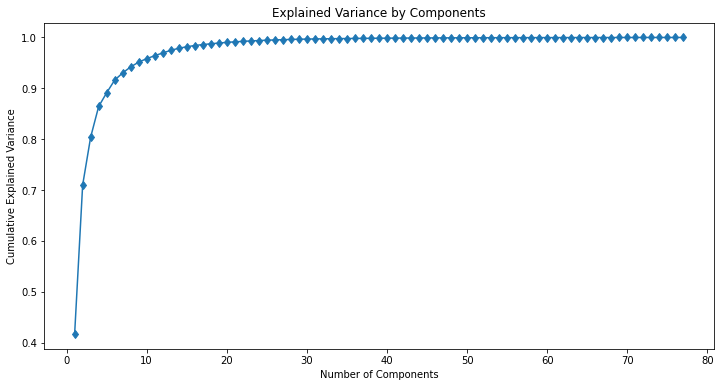

In [486]:
plt.figure(figsize=(12,6))
plt.plot(range(1,78), pca.explained_variance_ratio_.cumsum(), marker='d', linestyle='-')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [487]:
PcaReduction=PCA(n_components=10)

In [488]:
PcaReduction.fit(SampleForPCA)

PCA(n_components=10)

In [489]:
PcaReduction.explained_variance_ratio_

array([0.41706439, 0.29276156, 0.094278  , 0.06020146, 0.02698335,
       0.02491108, 0.01413815, 0.01190319, 0.00929563, 0.00686461])

Text(0, 0.5, 'Cumulative Explained Variance')

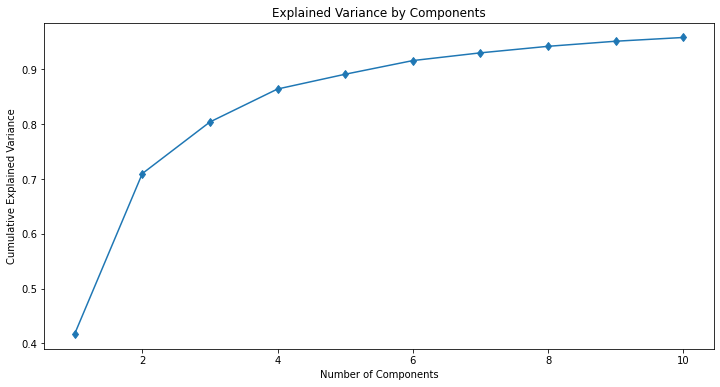

In [490]:
plt.figure(figsize=(12,6))
plt.plot(range(1,11), PcaReduction.explained_variance_ratio_.cumsum(), marker='d', linestyle='-')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [491]:
PcaReduction.transform(SampleForPCA)

array([[ 1.45256843e+00,  2.68430404e+00,  7.56539665e-04, ...,
        -1.82254360e-01,  1.71039785e-01,  3.34328740e-01],
       [ 1.02956118e+00,  2.46346049e+00, -5.44360284e-02, ...,
        -2.14731216e-01,  7.53134910e-02,  3.05098190e-01],
       [ 1.00103067e+00,  2.47097012e+00,  3.68743397e-02, ...,
        -1.70209310e-01,  9.15440206e-02,  2.36785041e-01],
       ...,
       [-2.81141690e+00, -6.49825702e-01,  5.95312330e-01, ...,
        -2.61051916e-01, -3.92604457e-01, -2.16716527e-01],
       [-2.52438619e+00, -5.83459114e-01,  5.79614125e-01, ...,
        -3.04032553e-01, -3.38487313e-01, -2.22442951e-01],
       [-1.97418478e+00, -4.78094564e-01,  6.29449541e-01, ...,
        -2.12377629e-01, -1.39627159e-01, -1.94258250e-01]])

# Question 1.c

# Random Forest

Loading the necessary libraries

In [492]:
from sklearn.ensemble import RandomForestClassifier

In [493]:
from sklearn.metrics import accuracy_score

Knowing the data that I will use (data set in prepared)

In [494]:
Data2.head(10)

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.188852,0.122652,0.13486,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.200404,0.116682,0.13486,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.193685,0.118508,0.13486,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.192112,0.132781,0.13486,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.205604,0.129954,0.13486,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730
5,0.447506,0.628176,0.367388,2.385939,4.807635,0.218578,0.176233,2.141282,0.195188,1.442398,...,0.190469,0.131575,0.13486,0.106476,0.109446,0.439833,0.116657,0.140766,0.142180,1.816389
6,0.428033,0.573696,0.342709,2.334224,4.473130,0.225173,0.184004,2.012414,0.195789,1.612036,...,0.181610,0.141806,0.13486,0.097834,0.111483,0.406293,0.137229,0.156682,0.157499,1.528484
7,0.416923,0.564036,0.327703,2.260135,4.268735,0.214834,0.179668,2.007985,0.189803,1.424601,...,0.191561,0.141013,0.13486,0.099494,0.113080,0.382532,0.123376,0.155612,0.159409,1.652658
8,0.386311,0.538428,0.317720,2.125725,4.063950,0.207222,0.167778,1.861514,0.180684,1.261891,...,0.186378,0.139589,0.13486,0.105145,0.105490,0.435687,0.125173,0.152711,0.158235,1.834599
9,0.380827,0.499294,0.362462,2.096266,3.598587,0.227649,0.188093,1.717861,0.188093,1.414329,...,0.189523,0.183678,0.13486,0.093300,0.116906,0.414793,0.146133,0.188849,0.192334,1.516862


Splitting the Data into Train and Test

In [495]:
D_train, D_test, t_train, t_test = train_test_split(Data2,
                                                       tag,
                                                       test_size = 0.3,
                                                       random_state=0)

Builing the Random Forest Model

In [496]:
myRF = RandomForestClassifier(criterion='gini',
                                 n_estimators=5,
                                 random_state=1,
                                 n_jobs=2)

Fitting the Model

In [497]:
myRF.fit(D_train, t_train)

RandomForestClassifier(n_estimators=5, n_jobs=2, random_state=1)

Predicting with the testdata set

In [498]:
y_pred = myRF.predict(D_test)

The accuracy of the prediction result

In [499]:
print('Test Accuracy: %.3f' % accuracy_score(t_test, y_pred))

Test Accuracy: 0.886


# Bagging

In [500]:
from sklearn.ensemble import BaggingClassifier

In [501]:
from sklearn.preprocessing import StandardScaler

In [502]:
# Instantiate the bagging classifier
bagginggclassifier = BaggingClassifier(base_estimator=myRF, n_estimators=100,max_features=10,
                                 max_samples=100,
                                 random_state=1, n_jobs=5)

Here I am going to Fit the bagging classifier

In [503]:
bagginggclassifier.fit(D_train, t_train)

BaggingClassifier(base_estimator=RandomForestClassifier(n_estimators=5,
                                                        n_jobs=2,
                                                        random_state=1),
                  max_features=10, max_samples=100, n_estimators=100, n_jobs=5,
                  random_state=1)

My Model scores on test and training data

In [504]:
print('Model test Score: %.3f, ' %bagginggclassifier.score(D_test, t_test),
      'Model training Score: %.3f' %bagginggclassifier.score(D_train, t_train))

Model test Score: 0.851,  Model training Score: 0.973


# Boosting

Loading the Libraries

In [505]:
from sklearn.ensemble import AdaBoostClassifier

Building the model

In [506]:
BoostingClassifier = AdaBoostClassifier(n_estimators = 50, learning_rate = 0.2).fit(D_train, t_train)

Testing the model with test data set

In [507]:
score = BoostingClassifier.score(D_test, t_test)

Result Accuracy

In [508]:
print(score)

0.5936507936507937


# Question 2

# K-means

Importing libraries

In [509]:
from sklearn.cluster import KMeans

In [510]:
import matplotlib.pyplot as plt

In [511]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MouseID          1080 non-null   object 
 1   DYRK1A_N         1077 non-null   float64
 2   ITSN1_N          1077 non-null   float64
 3   BDNF_N           1077 non-null   float64
 4   NR1_N            1077 non-null   float64
 5   NR2A_N           1077 non-null   float64
 6   pAKT_N           1077 non-null   float64
 7   pBRAF_N          1077 non-null   float64
 8   pCAMKII_N        1077 non-null   float64
 9   pCREB_N          1077 non-null   float64
 10  pELK_N           1077 non-null   float64
 11  pERK_N           1077 non-null   float64
 12  pJNK_N           1077 non-null   float64
 13  PKCA_N           1077 non-null   float64
 14  pMEK_N           1077 non-null   float64
 15  pNR1_N           1077 non-null   float64
 16  pNR2A_N          1077 non-null   float64
 17  pNR2B_N       

In [512]:
data.shape

(1080, 82)

In [513]:
Data2.shape

(1047, 77)

In [514]:
Data2.isnull().sum().sort_values(ascending=False)

DYRK1A_N    0
ADARB1_N    0
Tau_N       0
nNOS_N      0
ERBB4_N     0
           ..
GSK3B_N     0
ERK_N       0
ELK_N       0
CREB_N      0
CaNA_N      0
Length: 77, dtype: int64

here I am going to review the following variables 'pCFOS_N', 'ELK_N' and 'Bcatenin_N'

In [515]:
Data2['pCFOS_N'].describe()

count    1047.000000
mean        0.131217
std         0.023228
min         0.085419
25%         0.114180
50%         0.128796
75%         0.142786
max         0.256529
Name: pCFOS_N, dtype: float64

In [516]:
Data2['ELK_N'].describe()

count    1047.000000
mean        1.173229
std         0.336822
min         0.497695
25%         0.943846
50%         1.096470
75%         1.324281
max         2.802948
Name: ELK_N, dtype: float64

In [517]:
Data2['Bcatenin_N'].describe()

count    1047.000000
mean        2.147272
std         0.438178
min         1.134886
25%         1.821846
50%         2.117385
75%         2.425756
max         3.680552
Name: Bcatenin_N, dtype: float64

again here I am going to replace null values in the variables with their respective mean values

In [518]:
data2 = Data2.fillna(Data2.mean())

Checking for duplicates

In [519]:
duplicate = data2[data2.duplicated()]

In [520]:
print(duplicate)

Empty DataFrame
Columns: [DYRK1A_N, ITSN1_N, BDNF_N, NR1_N, NR2A_N, pAKT_N, pBRAF_N, pCAMKII_N, pCREB_N, pELK_N, pERK_N, pJNK_N, PKCA_N, pMEK_N, pNR1_N, pNR2A_N, pNR2B_N, pPKCAB_N, pRSK_N, AKT_N, BRAF_N, CAMKII_N, CREB_N, ELK_N, ERK_N, GSK3B_N, JNK_N, MEK_N, TRKA_N, RSK_N, APP_N, Bcatenin_N, SOD1_N, MTOR_N, P38_N, pMTOR_N, DSCR1_N, AMPKA_N, NR2B_N, pNUMB_N, RAPTOR_N, TIAM1_N, pP70S6_N, NUMB_N, P70S6_N, pGSK3B_N, pPKCG_N, CDK5_N, S6_N, ADARB1_N, AcetylH3K9_N, RRP1_N, BAX_N, ARC_N, ERBB4_N, nNOS_N, Tau_N, GFAP_N, GluR3_N, GluR4_N, IL1B_N, P3525_N, pCASP9_N, PSD95_N, SNCA_N, Ubiquitin_N, pGSK3B_Tyr216_N, SHH_N, BAD_N, BCL2_N, pS6_N, pCFOS_N, SYP_N, H3AcK18_N, EGR1_N, H3MeK4_N, CaNA_N]
Index: []

[0 rows x 77 columns]


In [521]:
data2.describe()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
count,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,...,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000,1047.000000
mean,0.427687,0.620014,0.318123,2.295002,3.832375,0.234218,0.182666,3.524576,0.212881,1.434011,...,0.226391,0.157846,0.134860,0.121453,0.131217,0.445290,0.169441,0.182973,0.206040,1.337624
std,0.252001,0.253789,0.049609,0.350937,0.940742,0.040621,0.026130,1.292710,0.032878,0.470792,...,0.029277,0.026787,0.023822,0.014422,0.023228,0.066820,0.054707,0.036742,0.048506,0.320842
min,0.145327,0.245359,0.115181,1.330831,1.737540,0.121000,0.107649,1.343998,0.112812,0.429032,...,0.155869,0.088305,0.080657,0.067254,0.085419,0.258626,0.079691,0.105537,0.101787,0.586479
25%,0.289362,0.474829,0.286351,2.051919,3.142801,0.206456,0.165104,2.447517,0.190780,1.211245,...,0.205905,0.140572,0.119894,0.110404,0.114180,0.397362,0.133746,0.158551,0.174236,1.075982
50%,0.366378,0.567582,0.314915,2.291518,3.720282,0.231623,0.182758,3.326520,0.211084,1.358888,...,0.223363,0.157846,0.134860,0.121626,0.128796,0.447039,0.169441,0.182973,0.206040,1.316591
75%,0.488768,0.701982,0.346421,2.529050,4.404937,0.258180,0.197713,4.432086,0.234874,1.565268,...,0.241432,0.167896,0.140229,0.131967,0.142786,0.490714,0.185796,0.196485,0.219440,1.591482
max,2.516367,2.602662,0.497160,3.757641,8.482553,0.539050,0.317066,7.464070,0.306247,6.113347,...,0.358289,0.282016,0.261506,0.158748,0.256529,0.759588,0.479763,0.360692,0.413903,2.129791


Here I am going to count the values of categorical variables

In [522]:
print(PreparedData['class'].value_counts())

c-CS-m    150
c-SC-m    150
t-CS-m    135
t-SC-m    135
t-SC-s    132
c-CS-s    120
c-SC-s    120
t-CS-s    105
Name: class, dtype: int64


Preparing dataset to apply Clustering algorithm

In [523]:
X = PreparedData.drop('class',axis=1)

In [524]:
PreparedData

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,1.057971,...,0.183324,0.374088,0.318782,0.204660,0.328327,1.364823,Ts65Dn,Saline,S/C,t-SC-s
1076,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,1.081150,...,0.175674,0.375259,0.325639,0.200415,0.293435,1.364478,Ts65Dn,Saline,S/C,t-SC-s
1077,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,0.884342,...,0.158296,0.422121,0.321306,0.229193,0.355213,1.430825,Ts65Dn,Saline,S/C,t-SC-s
1078,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,0.922595,...,0.196296,0.397676,0.335936,0.251317,0.365353,1.404031,Ts65Dn,Saline,S/C,t-SC-s


In [525]:
y1 = PreparedData[['class']]

Encoding categorical variables

In [526]:
classes = {"class":     {"c-CS-m": 0, "c-SC-m": 1, 'c-CS-s': 2, 'c-SC-s': 3, 't-CS-m':4, 't-SC-m':5,
                            't-SC-s':6, 't-CS-s':7}}

In [527]:
y = y1.replace(classes)

In [528]:
y = pd.DataFrame(y)

In [529]:
y.reset_index()

,index,class
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
1042,1075,6
1043,1076,6
1044,1077,6
1045,1078,6


In [530]:
y['class'].value_counts()

0    150
1    150
4    135
5    135
6    132
2    120
3    120
7    105
Name: class, dtype: int64

For the independent variables in dataframe I used the get_dummies method to prepare the categorical data

In [531]:
X = pd.get_dummies(data=X,columns=["Treatment","Behavior", "Genotype"])

In [532]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1047 entries, 0 to 1079
Data columns (total 83 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DYRK1A_N             1047 non-null   float64
 1   ITSN1_N              1047 non-null   float64
 2   BDNF_N               1047 non-null   float64
 3   NR1_N                1047 non-null   float64
 4   NR2A_N               1047 non-null   float64
 5   pAKT_N               1047 non-null   float64
 6   pBRAF_N              1047 non-null   float64
 7   pCAMKII_N            1047 non-null   float64
 8   pCREB_N              1047 non-null   float64
 9   pELK_N               1047 non-null   float64
 10  pERK_N               1047 non-null   float64
 11  pJNK_N               1047 non-null   float64
 12  PKCA_N               1047 non-null   float64
 13  pMEK_N               1047 non-null   float64
 14  pNR1_N               1047 non-null   float64
 15  pNR2A_N              1047 non-null   f

In [533]:
from sklearn.cluster import KMeans

In [534]:
from sklearn.preprocessing import MinMaxScaler

I am going to check the best number of clusters

First ishould Scale my data because it seems that data are far from each other and scaling is the technique to make them closer to each other and making the data generalized.

In [535]:
scaling = MinMaxScaler()

In [536]:
df_scaled = scaling.fit_transform(X)

In [537]:
df_scaled = pd.DataFrame(df_scaled)

In [538]:
df_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,73,74,75,76,77,78,79,80,81,82
0,0.151122,0.212885,0.824638,0.612119,0.630482,0.234015,0.333862,0.168257,0.617322,0.232553,...,0.087715,0.102890,0.084580,0.705738,1.0,0.0,1.0,0.0,1.0,0.0
1,0.155750,0.188226,0.776455,0.601070,0.585247,0.216807,0.311188,0.154925,0.590173,0.205362,...,0.080692,0.115874,0.093977,0.749771,1.0,0.0,1.0,0.0,1.0,0.0
2,0.153459,0.205696,0.793572,0.558911,0.575910,0.210527,0.325060,0.153485,0.607102,0.199194,...,0.080465,0.109050,0.082162,0.868229,1.0,0.0,1.0,0.0,1.0,0.0
3,0.125169,0.157688,0.637326,0.468152,0.480646,0.243717,0.328596,0.132074,0.486945,0.205135,...,0.126763,0.164241,0.144543,0.721879,1.0,0.0,1.0,0.0,1.0,0.0
4,0.122146,0.157838,0.637787,0.426467,0.441977,0.220323,0.315055,0.129086,0.410194,0.189152,...,0.096959,0.136298,0.149281,0.812053,1.0,0.0,1.0,0.0,1.0,0.0


In [539]:
silo = []

then, I checked the best silhouette score using Elbow Method on the df_sclaed dataframe.

In [540]:
from sklearn.metrics import silhouette_score

In [541]:
for counter in [2,3,4,5,6,7,8,9,10]:
    Kmea = KMeans(n_clusters=counter, init = 'k-means++', n_init=10, max_iter=100, random_state=42)
    Kmea.fit(df_scaled)
    silo.append(silhouette_score(df_scaled, Kmea.predict(df_scaled)))

I am checking the best silhouette score using Elbow Method on the df_sclaed dataframe

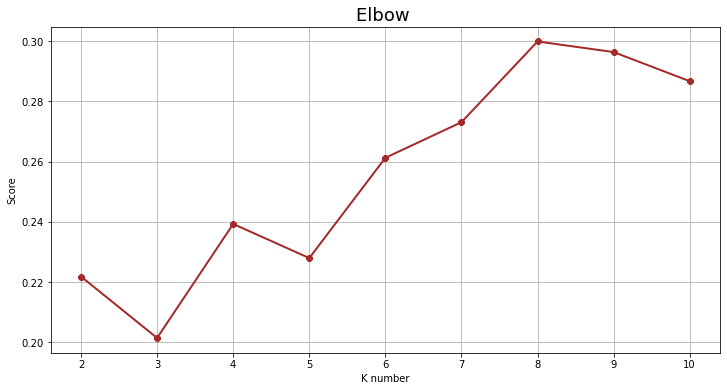

In [542]:
plt.figure(figsize=(12,6))
plt.grid()
plt.plot([2,3,4,5,6,7,8,9,10], silo, linewidth=2, color='brown', marker = '8')
plt.xlabel('K number')
plt.ylabel('Score')
plt.title('Elbow ', fontsize=18)
plt.show()

Based on the above I clearly see that the highest Silhouette Score I can get while running Kmeans clustering is 8 clusters

Here I am Checking the best number of clusters with their inertia

In [543]:
wcss=[]
for k in range(1,13):
    kmeans = KMeans(n_clusters=k, init ='k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

C:\Users\Samaneh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


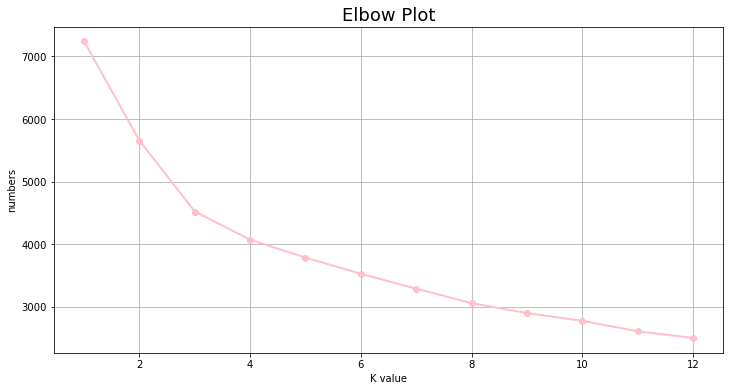

In [544]:
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,13), wcss, linewidth=2, color='pink', marker = '8')
plt.xlabel('K value')
plt.ylabel('numbers')
plt.title('Elbow Plot', fontsize=18)
plt.show()

from this result I can understand that if I take consider Silhouette and WCSS the best number of clusters for my dataset is 8.

Here I want to apply K-means to data with 8 cluster number

In [545]:
clust1 = KMeans(n_clusters=8, random_state=42)

In [546]:
clust2 = clust1.fit(X)

In [547]:
inter = clust1.inertia_

In [548]:
inter = clust1.inertia_

In [549]:
print('The list of clusters:  ', clust1.labels_)

The list of clusters:   [7 7 7 ... 2 2 2]


In [550]:
print('The inertia number of clusters is:   ', clust1.inertia_ )

The inertia number of clusters is:    3107.4539255206355


# H-Clustering

In [551]:
from sklearn.cluster import AgglomerativeClustering

In [552]:
import scipy.cluster.hierarchy as shc

In [553]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [554]:
from scipy.cluster.hierarchy import fcluster

In [555]:
from scipy.cluster.hierarchy import cophenet

In [556]:
from sklearn.cluster import AgglomerativeClustering

In [557]:
import matplotlib.pyplot as plt

In [558]:
import sklearn.metrics as sm

Size of the figure

Titling of the Dendrogram

Call the method dendrogram by using an object

Draw the red line to cut the dendrogram

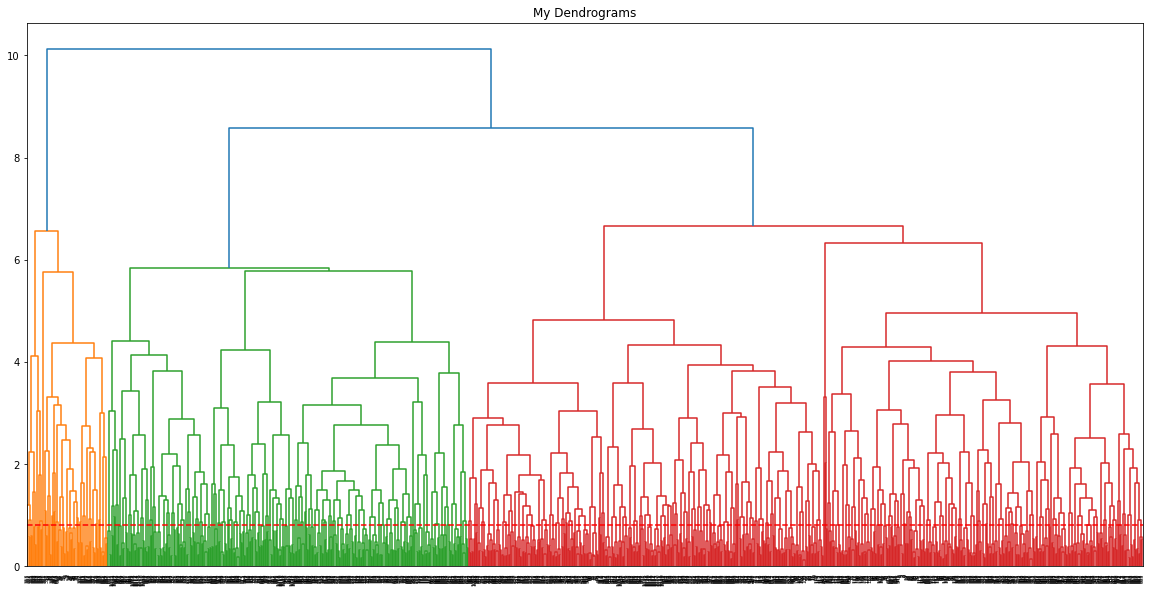

In [559]:
plt.figure(figsize=(20, 10)) 
plt.title("My Dendrograms")
dend = shc.dendrogram(shc.linkage(X, method = 'complete'))
plt.axhline(y = 0.8, color = 'r', linestyle = '--')

First I am going to import AgglomerativeClustering from sklearn 
then initialise the cluster using a method AgglomerativeClustering
then train the model by calling a fit

In [560]:
H_clustering = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='ward')  

In [561]:
H_clustering_1_model = H_clustering.fit(X)

In [562]:
H_clusteringlabels = H_clustering_1_model.labels_

In [563]:
X['H_clusteringlabels'] = H_clusteringlabels

In [564]:
silhoutscoreH_clustering = silhouette_score(X, H_clusteringlabels)

In [565]:
print('silhoutscoreH_clustering for H_clustering:',  silhoutscoreH_clustering)

silhoutscoreH_clustering for H_clustering: 0.3180373971297092
